# Make inspection plots from HDF5 dataset
---
* Amplitude versus subband/frequency for both XX and YY with all stations on the same axes.
* Clock versus time for XX with all stations on the same axes.
* Clock difference between XX and YY versus time with all stations on the same axes.
* TEC versus time for XX with all stations on the same axes.
* TEC difference between XX and YY versus time with all stations on same axes.

A test dataset can be found [here](https://github.com/mooneyse/Jupyter-Notebooks.git).

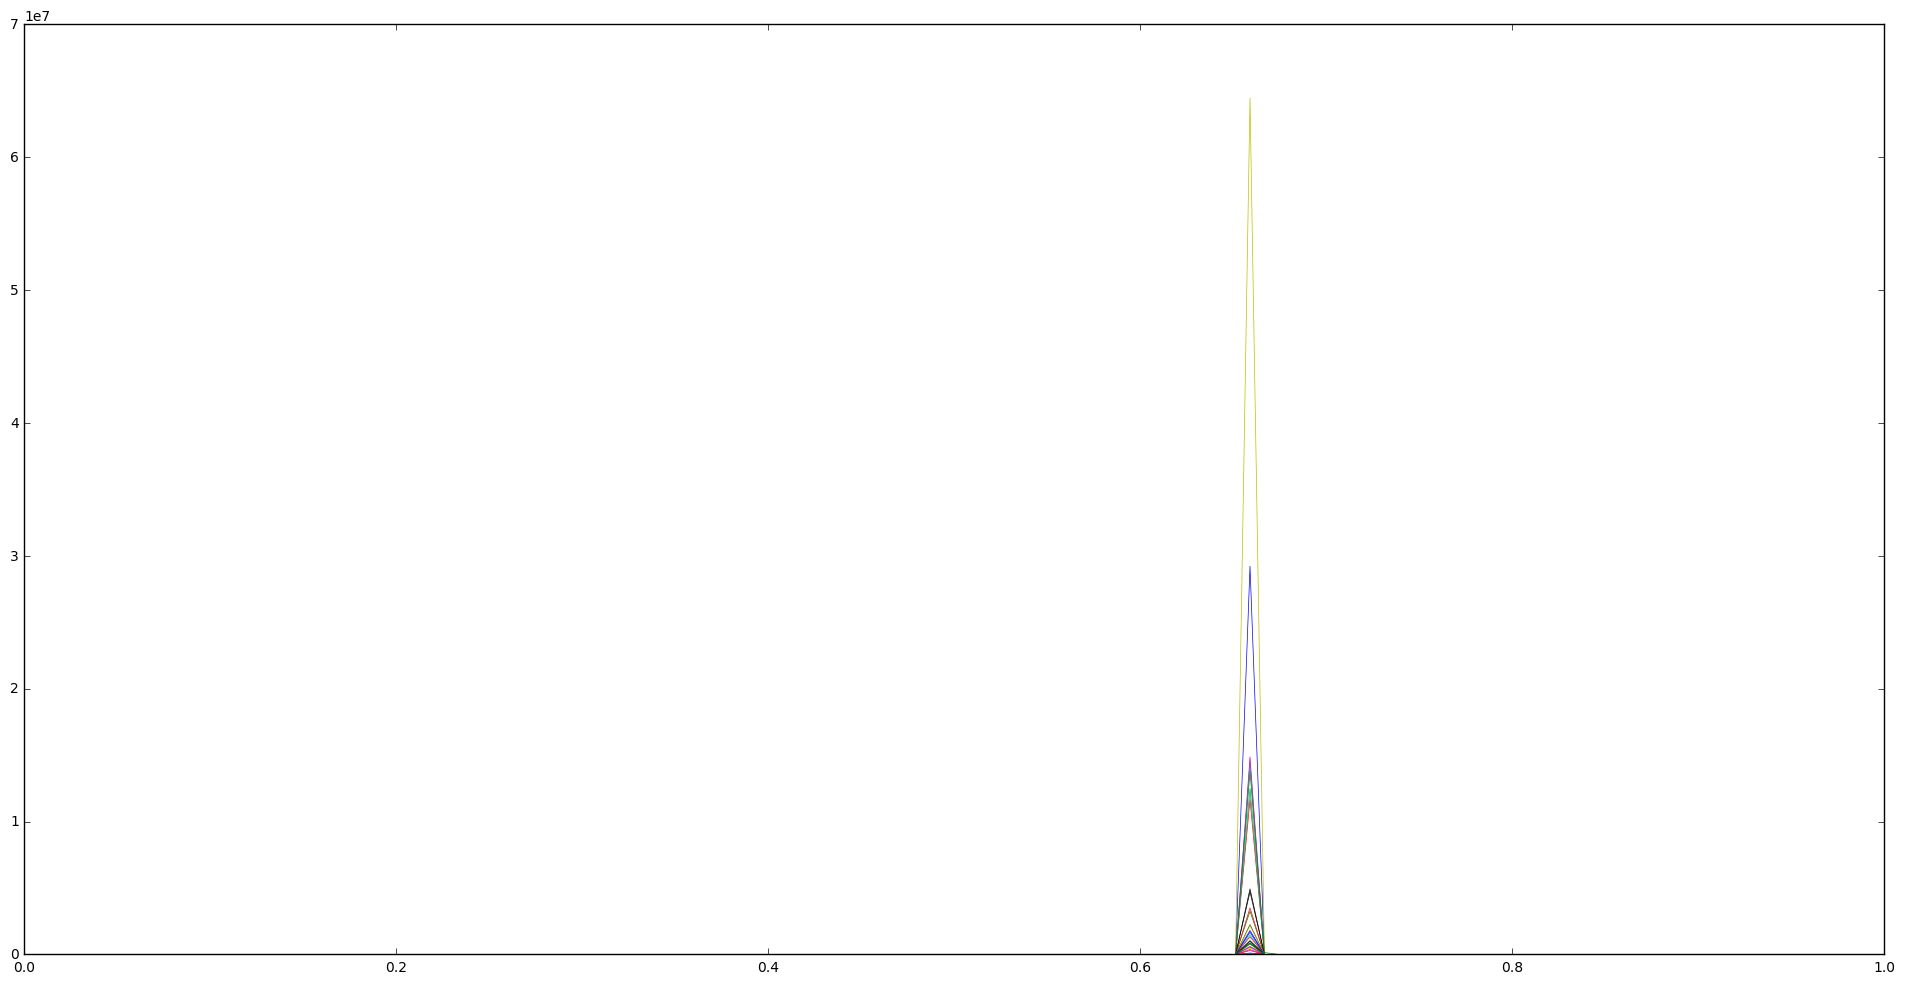

In [134]:
''' amplitude versus frequency for XX and YY ============================================== '''
    
# import required modules ---------------------------------------------------------------------

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from losoto.h5parm import h5parm

# load the data -------------------------------------------------------------------------------

name = '/home/sean/test.h5'
f = h5parm(name, readonly = True)
amplitude = f.getSoltab('sol000', 'amplitude000')

# set up the plot -----------------------------------------------------------------------------

plt.figure(figsize = (24, 12))
normalised = [(frequency - min(amplitude.freq[:]))/(max(amplitude.freq[:]) - min(amplitude.freq[:])) for frequency in amplitude.freq[:]]

# plot the amplitude for each station ---------------------------------------------------------

for a in (range(len(amplitude.ant[:]))):
    xx = []
    average_xx = []
    yy = []
    average_yy = []
        
    for value in amplitude.val[0, 0, a, :, :]: # [polarisation, 0, station, frequency, time]
        xx.append(value) # each list entry represents a subband and is a list of values per measurement in time

    for time in range(len(xx)):
        average_xx.append(np.average(xx[time])) # average over the observation for each subband
        
    for value in amplitude.val[1, 0, a, :, 0]:
        yy.append(value)

    for time in range(len(yy)):
        average_yy.append(np.average(yy[time]))

    plt.plot(normalised, average_xx, lw = 0.5, label = str(amplitude.ant[a])[2:-1]) # one series per station per polarisation
    plt.plot(normalised, average_yy, lw = 0.5, label = str(amplitude.ant[a])[2:-1])

plt.show()

# tidy up/ the plot ----------------------------------------------------------------------------

# mpl.rcParams.update({'font.size': 10})
# plt.xlim(min(normalised), max(normalised))
# plt.title('Polarisation ' + str(clock.pol[0])[2:-1] + ' and ' + str(clock.pol[1])[2:-1] + ' clock difference versus time for all stations', fontsize = 10)
# plt.xlabel('Time (normalised)', fontsize = 10)
# plt.ylabel(str(clock.pol[0])[2:-1] + ' and ' + str(clock.pol[1])[2:-1] + ' clock difference (ns)', fontsize = 10)
# plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.05), ncol = 17, frameon = False, fontsize = 7)
# plt.savefig('clock_difference_xx_yy.png', bbox_inches = 'tight')

In [122]:
a = [[1,2,3,4],[6,3,2,0],[4,1,4,1]]
b = [0,0,0]
b[0]=(a[0][0]+a[0][1]+a[0][2] +a[0][3])/len(a[0])
b[1]=(a[1][0]+a[1][1]+a[1][2] +a[1][3])/len(a[1])
b[2]=(a[2][0]+a[2][1]+a[2][2] +a[2][3])/len(a[2])
print(b)
np.average(b)

[2.5, 2.75, 2.5]


2.5833333333333335

In [1]:
# have to average over frequency for these scripts

''' clock versus time for XX ============================================================== '''

# import required modules ---------------------------------------------------------------------

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from losoto.h5parm import h5parm

# load the data -------------------------------------------------------------------------------

name = '/home/sean/test.h5'
f = h5parm(name, readonly = True)
clock = f.getSoltab('sol000', 'clock000')

# set up the plot -----------------------------------------------------------------------------

p = 0 # 0 = XX; 1 = YY
plt.figure(figsize = (24, 12))
normalised = [(time - min(clock.time[:]))/(max(clock.time[:]) - min(clock.time[:])) for time in clock.time[:]]

# plot the clock values for each station ------------------------------------------------------

for a in (range(len(clock.ant[:]))):
    values = []

    for value in clock.val[:, a, p]:
        values.append(value * 1e9)

    plt.plot(normalised, values, lw = 0.5, label = str(clock.ant[a])[2:-1])

# tidy up the plot ----------------------------------------------------------------------------

mpl.rcParams.update({'font.size': 10})
plt.xlim(min(normalised), max(normalised))
plt.title('Clock versus time for the ' + str(clock.pol[p])[2:-1] + ' polarisation for all stations', fontsize = 10)
plt.xlabel('Time (normalised)', fontsize = 10)
plt.ylabel(r'Clock (ns)', fontsize = 10)
plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.05), ncol = 17, frameon = False, fontsize = 7)
plt.savefig('clock_xx.png', bbox_inches = 'tight')

In [2]:
''' clock difference between XX and YY versus time ======================================== '''

# import required modules ---------------------------------------------------------------------

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from losoto.h5parm import h5parm

# load the data -------------------------------------------------------------------------------

name = '/home/sean/test.h5'
f = h5parm(name, readonly = True)
clock = f.getSoltab('sol000', 'clock000')

# set up the plot -----------------------------------------------------------------------------

plt.figure(figsize = (24, 12))
normalised = [(time - min(clock.time[:]))/(max(clock.time[:]) - min(clock.time[:])) for time in clock.time[:]]

# plot the clock difference for each station --------------------------------------------------

for a in (range(len(clock.ant[:]))):
    xx = []
    yy = []
    difference = []

    for value in clock.val[:, a, 0]:
        xx.append(value * 1e9)

    for value in clock.val[:, a, 1]:
        yy.append(value * 1e9)
    
    if len(xx) == len(yy):
        for i in range(len(xx)):
            difference.append(xx[i] - yy[i])

    else:
        print('Cannot find difference as lists of XX and YY clock values have different lengths. Exiting...')
        sys.exit()
   
    plt.plot(normalised, difference, lw = 0.5, label = str(clock.ant[a])[2:-1])

# tidy up the plot ----------------------------------------------------------------------------

mpl.rcParams.update({'font.size': 10})
plt.xlim(min(normalised), max(normalised))
plt.title('Polarisation ' + str(clock.pol[0])[2:-1] + ' and ' + str(clock.pol[1])[2:-1] + ' clock difference versus time for all stations', fontsize = 10)
plt.xlabel('Time (normalised)', fontsize = 10)
plt.ylabel(str(clock.pol[0])[2:-1] + ' and ' + str(clock.pol[1])[2:-1] + ' clock difference (ns)', fontsize = 10)
plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.05), ncol = 17, frameon = False, fontsize = 7)
plt.savefig('clock_difference_xx_yy.png', bbox_inches = 'tight')

In [3]:
''' TEC versus time for XX ================================================================ '''

# import required modules ---------------------------------------------------------------------

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from losoto.h5parm import h5parm

# load the data -------------------------------------------------------------------------------

name = '/home/sean/test.h5'
f = h5parm(name, readonly = True)
tec = f.getSoltab('sol000', 'tec000')

# set up the plot -----------------------------------------------------------------------------

p = 0 # 0 = XX; 1 = YY
plt.figure(figsize = (24, 12))
normalised = [(time - min(tec.time[:]))/(max(tec.time[:]) - min(tec.time[:])) for time in tec.time[:]]

# plot the TEC values for each station --------------------------------------------------------

for a in (range(len(tec.ant[:]))):
    values = []

    for value in tec.val[:, a, p]:
        values.append(value)

    plt.plot(normalised, values, lw = 0.5, label = str(tec.ant[a])[2:-1])

# tidy up the plot ----------------------------------------------------------------------------

mpl.rcParams.update({'font.size': 10})
plt.xlim(min(normalised), max(normalised))
plt.title('TEC versus time for the ' + str(tec.pol[p])[2:-1] + ' polarisation for all stations', fontsize = 10)
plt.xlabel('Time (normalised)', fontsize = 10)
plt.ylabel(r'TEC ($10^{16} \cdot \mathrm{m}^{-2}$)', fontsize = 10)
plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.05), ncol = 17, frameon = False, fontsize = 7)
plt.savefig('tec_xx.png', bbox_inches = 'tight')

In [4]:
''' TEC difference between XX and YY versus time ========================================== '''

# import required modules ---------------------------------------------------------------------

import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from losoto.h5parm import h5parm

# load the data -------------------------------------------------------------------------------

name = '/home/sean/test.h5'
f = h5parm(name, readonly = True)
tec = f.getSoltab('sol000', 'tec000')

# set up the plot -----------------------------------------------------------------------------

plt.figure(figsize = (24, 12))
normalised = [(time - min(tec.time[:]))/(max(tec.time[:]) - min(tec.time[:])) for time in tec.time[:]]

# plot the TEC difference for each station ----------------------------------------------------

for a in (range(len(tec.ant[:]))):
    xx = []
    yy = []
    difference = []

    for value in tec.val[:, a, 0]:
        xx.append(value)

    for value in tec.val[:, a, 1]:
        yy.append(value)
    
    if len(xx) == len(yy):
        for i in range(len(xx)):
            difference.append(xx[i] - yy[i])

    else:
        print('Cannot find difference as lists of XX and YY TEC values have different lengths. Exiting...')
        sys.exit()
   
    plt.plot(normalised, difference, lw = 0.5, label = str(tec.ant[a])[2:-1])

# tidy up the plot ----------------------------------------------------------------------------

mpl.rcParams.update({'font.size': 10})
plt.xlim(min(normalised), max(normalised))
plt.title('Polarisation ' + str(tec.pol[0])[2:-1] + ' and ' + str(tec.pol[1])[2:-1] + ' TEC difference versus time for all stations', fontsize = 10)
plt.xlabel('Time (normalised)', fontsize = 10)
plt.ylabel(str(tec.pol[0])[2:-1] + ' and ' + str(tec.pol[1])[2:-1] + r' TEC difference ($10^{16} \cdot \mathrm{m}^{-2}$)', fontsize = 10)
plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.05), ncol = 17, frameon = False, fontsize = 7)
plt.savefig('tec_difference_xx_yy.png', bbox_inches = 'tight')